# 2.Clasification

Import important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
#model selection
from sklearn.model_selection import train_test_split

#classifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Experiment with deeplearning eh multi layer JST
import tensorflow as tf
from tensorflow import keras

sns.set()
%matplotlib inline
classifier = 'svm'
postfix = '_no_outliers_3'

### Import datasets

In [2]:
df = pd.read_csv('data/main_dataset_no_outliers_3.csv')
y = df['best_pos']
X = df.drop(['best_pos'], axis=1)
d = joblib.load('data/label_encoder_model.sav')
print(X.shape, y.shape)

(16122, 57) (16122,)


(array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
        22.5, 24.5, 26.5, 28.5, 30.5, 32.5, 34.5, 36.5, 38.5, 40.5, 42.5,
        44.5, 46.5, 48.5, 50.5, 52.5, 54.5, 56.5]),
 <a list of 29 Text yticklabel objects>)

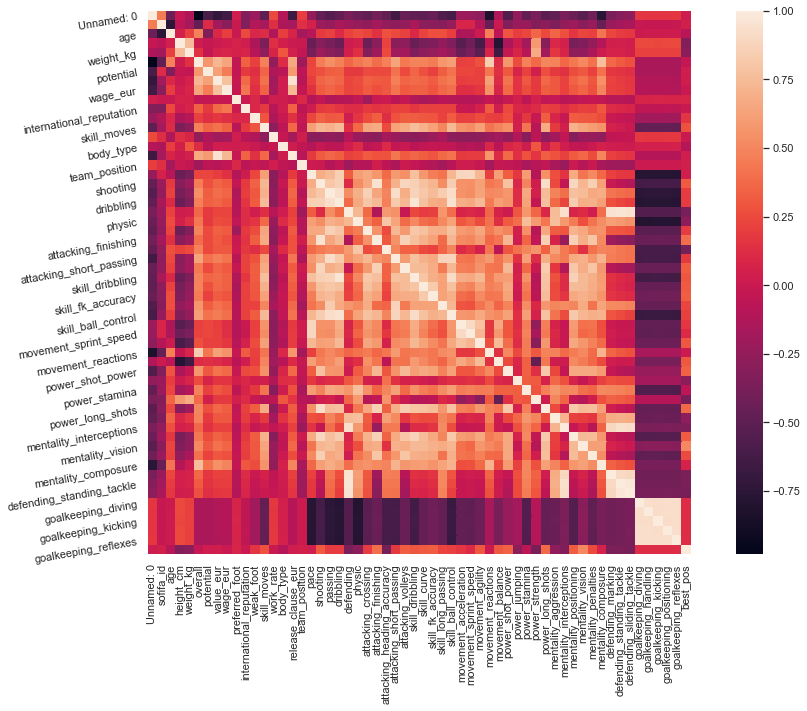

In [3]:
corr = df.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(16, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=90)
plt.yticks(rotation=10)

Nice, let's build a dataframe using "i think this is important feature"

In [4]:
i_think_important = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
X = X[i_think_important]
X.head()

,pace,shooting,passing,dribbling,defending,physic
0,69.0,89.0,75.0,80.0,30.0,65.0
1,56.0,50.0,61.0,63.0,86.0,82.0
2,87.0,69.0,77.0,83.0,69.0,53.0
3,69.0,74.0,81.0,76.0,82.0,79.0
4,71.0,61.0,57.0,62.0,82.0,80.0


## Clasify

In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10101)

In [6]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
result = clf.predict(X_test)

In [8]:
classes = d['best_pos'].classes_
print(*zip(range(8),classes),sep='\n')

(0, 'Back_Centre')
(1, 'Back_Side')
(2, 'Back_Winger')
(3, 'Fwd_Centre')
(4, 'Fwd_Winger')
(5, 'Goal_Keeper')
(6, 'Mid_Centre')
(7, 'Mid_Side')


In [9]:
d['best_pos'].inverse_transform([6])

array(['Mid_Centre'], dtype=object)

In [10]:
result = pd.DataFrame(result)
result_inverse = d['best_pos'].inverse_transform(np.ravel(result))

In [11]:
clf.score(X_test,y_test)*100

76.15976184569587

In [12]:
report = classification_report(y_test, result, zero_division=True, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report.to_csv('output/'+ classifier + postfix +'.csv')

In [13]:
df_report

,precision,recall,f1-score,support
0,0.897183,0.867847,0.882271,734.000000
1,0.720379,0.740260,0.730184,616.000000
2,1.000000,0.000000,0.000000,39.000000
3,0.863287,0.896332,0.879499,627.000000
4,0.000000,0.000000,0.000000,180.000000
5,1.000000,1.000000,1.000000,202.000000
6,0.715953,0.810573,0.760331,1135.000000
7,0.533698,0.588353,0.559694,498.000000
accuracy,0.761598,0.761598,0.761598,0.761598
macro avg,0.716313,0.612921,0.601497,4031.000000


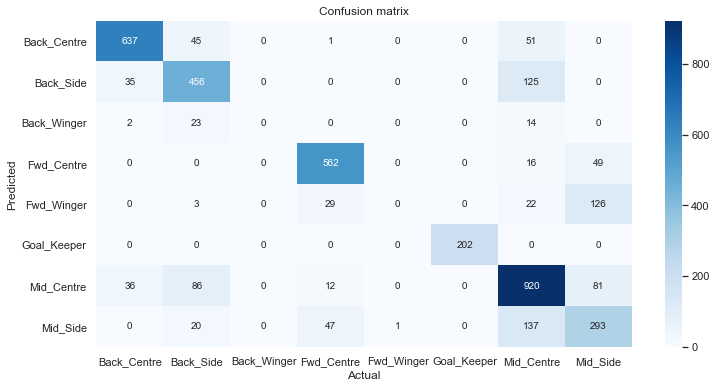

In [14]:
conf_matrix = confusion_matrix(y_test, result)
plt.figure(figsize=(12,6))
sns.heatmap(conf_matrix, 
            annot=True,
            xticklabels=classes, 
            yticklabels=classes,
            cmap="Blues",
            fmt='d')
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [15]:
#save model
joblib.dump(clf,'model/'+ classifier + postfix +'.sav')

['model/svm_no_outliers_3.sav']